# Ejercicio 9

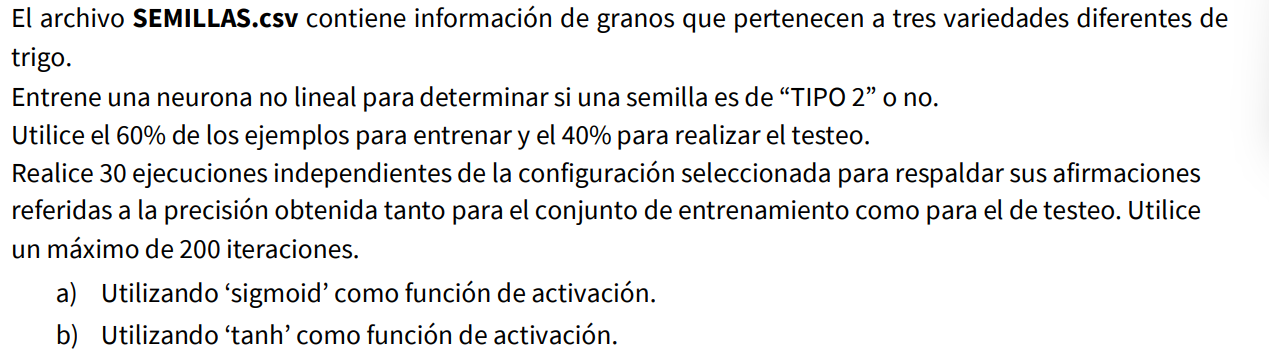

# Importe de librerias y lectura de datos

In [28]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [29]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

# importa neurona lineal de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassNeuronaLineal import NeuronaLineal

nombre_archivo = DATOS_DIR + 'SEMILLAS.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

df.head()

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1


### Tratamiento de datos nulos

In [30]:
df.isnull().sum()

Area           0
Perimetro      0
Compacidad     0
LongNucleo     0
AnchoNucleo    0
Asimetria      0
LongSurco      0
Clase          0
dtype: int64

El dataset no tiene datos nulos

### Encodeo, numeracion y normalizacion

In [31]:
df['Clase'].unique()

array(['Tipo1', 'Tipo2', 'Tipo3'], dtype=object)

Vemos que hay tres tipos de semillas, pero la clasificacion la quiero basar en una

In [32]:
df_one_hot = pd.get_dummies(df['Clase'], prefix='Clase')
df_one_hot.head()

,Clase_Tipo1,Clase_Tipo2,Clase_Tipo3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [33]:
df = pd.concat([df,df_one_hot], axis=1)
df.head()

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase,Clase_Tipo1,Clase_Tipo2,Clase_Tipo3
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1,1,0,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1,1,0,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1,1,0,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1,1,0,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1,1,0,0


In [34]:
df = df.drop('Clase', axis=1)
df.head()

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase_Tipo1,Clase_Tipo2,Clase_Tipo3
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,0,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0,0


### Division en X e Y

In [35]:
Y = df['Clase_Tipo2']
X = df.drop(columns=['Clase_Tipo2', 'Clase_Tipo1', 'Clase_Tipo3'])

In [36]:
Y = np.array(Y)
X = np.array(X)

In [37]:
Y.shape

(210,)

### Normalizacion de datos

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


### Division en test y train

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=42)

In [41]:
X_train

array([[-6.12355752e-01, -4.90684175e-01, -9.75628247e-01,
        -3.54141959e-01, -7.02215750e-01,  1.06921864e+00,
        -2.66595778e-02],
       [-1.16010968e+00, -1.15845325e+00, -1.00532312e+00,
        -1.01476452e+00, -1.32851936e+00,  1.45055885e+00,
        -8.28195082e-01],
       [ 4.55592155e-01,  6.29939796e-01, -5.17478701e-01,
         3.01955793e-01,  3.40738987e-01,  3.90539738e-01,
         6.01515830e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00,
        -7.63637453e-01,  2.08047544e-01, -6.67479334e-01,
        -1.18919199e+00],
       [ 2.01961909e+00,  2.04990853e+00,  2.24893250e-01,
         2.15034153e+00,  1.47392390e+00,  5.00541721e-01,
         2.12708468e+00],
       [ 1.76547702e-01,  1.54058384e-01,  6.40621542e-01,
         1.63949025e-01,  3.56661960e-01, -1.55549534e+00,
        -5.63056111e-01],
       [ 1.07913593e+00,  9.90688609e-01,  1.20058210e+00,
         7.92897905e-01,  1.13688764e+00, -9.62151312e-01,
         1.0420544

# Inciso a - Salida sigmoid

In [19]:
from ClassNeuronaGral import NeuronaGradiente
train_accuracies = []
test_accuracies = []
for i in range(30):
    #division de datos
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=42)
    #modelo
    modelo_sigmoid = NeuronaGradiente(alpha=0.01, n_iter=200, FUN='sigmoid', COSTO='EC_binaria')
    #entrenamiento
    modelo_sigmoid.fit(X_train, y_train)
    #predicciones
    y_train_pred = modelo_sigmoid.predict(X_train)
    y_test_pred = modelo_sigmoid.predict(X_test)
    #accuracy
    train_accuracy = modelo_sigmoid.accuracy(X_train, y_train)
    test_accuracy = modelo_sigmoid.accuracy(X_train,y_train)
    #guardo los resultados
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


#calculo el promedio de los accuracys
train_mean = np.mean(train_accuracies)
train_std = np.std(train_accuracies)
test_mean = np.mean(test_accuracies)
test_std = np.std(test_accuracies)


print(f'Precisión promedio en entrenamiento: {train_mean:.4f} ± {train_std:.4f}')
print(f'Precisión promedio en prueba: {test_mean:.4f} ± {test_std:.4f}')


c:\Users\VICTUS\Documents\2024\Deep Learning UNLP\03 - Optimización por gradiente\../Fuentes\ClassNeuronaGral.py:105: RuntimeWarning: overflow encountered in scalar negative
  return(-y*np.log(y_hat+EPS)-(1-y)*np.log(1-y_hat+EPS))


Precisión promedio en entrenamiento: 1.0000 ± 0.0000
Precisión promedio en prueba: 1.0000 ± 0.0000


In [44]:
train_accuracies = []
test_accuracies = []

iteraciones_promedio = []
iteracion_mejor_accuracy_train = []
veces_100_train = 0
veces_100_test = 0


for i in range(30):
    #division de datos
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=None)
    #modelo
    modelo_sigmoid = NeuronaGradiente(alpha=0.1, n_iter=200, FUN='sigmoid', COSTO='EC_binaria')
    #entrenamiento
    modelo_sigmoid.fit(X_train, y_train)
    #predicciones
    y_train_pred = modelo_sigmoid.predict(X_train)
    y_test_pred = modelo_sigmoid.predict(X_test)
    #accuracy
    train_accuracy = modelo_sigmoid.accuracy(X_train, y_train)
    test_accuracy = modelo_sigmoid.accuracy(X_test,y_test)
    #guardo los resultados
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Encontrar la iteración con mejor accuracy
    best_train_iter = np.argmax(modelo_sigmoid.accuracy_)  # Encontrar la iteración donde se alcanzó el mejor accuracy en entrenamiento
    iteracion_mejor_accuracy_train.append(best_train_iter)
    # Contar si se alcanzó 100% de accuracy
    if train_accuracy > 0.9999:
        veces_100_train += 1
    if test_accuracy > 0.9999:
        veces_100_test += 1

    iteraciones_promedio.append(len(modelo_sigmoid.errors_))


#calculo el promedio de los accuracys
train_mean = np.mean(train_accuracies)
train_std = np.std(train_accuracies)
test_mean = np.mean(test_accuracies)
test_std = np.std(test_accuracies)
iteraciones_mean = np.mean(iteraciones_promedio)
iter_mejor_accuracy_mean = np.mean(iteracion_mejor_accuracy_train)


print(f'Iteraciones promedio: {iteraciones_mean:.2f}')
print(f'Precisión promedio en entrenamiento: {train_mean:.4f} ± {train_std:.4f}')
print(f'Precisión promedio en prueba: {test_mean:.4f} ± {test_std:.4f}')
print(f'Iteración promedio con mejor accuracy en train: {iter_mejor_accuracy_mean:.2f}')
print(f'Veces con 100% de accuracy en train: {veces_100_train} de 30')
print(f'Veces con 100% de accuracy en test: {veces_100_test} de 30')
print(' ')

c:\Users\VICTUS\Documents\2024\Deep Learning UNLP\03 - Optimización por gradiente\../Fuentes\ClassNeuronaGral.py:105: RuntimeWarning: overflow encountered in scalar negative
  return(-y*np.log(y_hat+EPS)-(1-y)*np.log(1-y_hat+EPS))


Iteraciones promedio: 200.00
Precisión promedio en entrenamiento: 0.9849 ± 0.0066
Precisión promedio en prueba: 0.9754 ± 0.0150
Iteración promedio con mejor accuracy en train: 68.70
Veces con 100% de accuracy en train: 1 de 30
Veces con 100% de accuracy en test: 1 de 30
 


# Inciso b - Salida tanh 

In [23]:
train_accuracies = []
test_accuracies = []

iteraciones_promedio = []
iteracion_mejor_accuracy_train = []
veces_100_train = 0
veces_100_test = 0


for i in range(30):
    #division de datos
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=None)
    #modelo
    modelo_tanh = NeuronaGradiente(alpha=0.1, n_iter=200, FUN='tanh', COSTO='EC_binaria')
    #entrenamiento
    modelo_tanh.fit(X_train, y_train)
    #predicciones
    y_train_pred = modelo_tanh.predict(X_train)
    y_test_pred = modelo_tanh.predict(X_test)
    #accuracy
    train_accuracy = modelo_tanh.accuracy(X_train, y_train)
    test_accuracy = modelo_tanh.accuracy(X_test,y_test)
    #guardo los resultados
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Encontrar la iteración con mejor accuracy
    best_train_iter = np.argmax(modelo_tanh.accuracy_)  # Encontrar la iteración donde se alcanzó el mejor accuracy en entrenamiento
    iteracion_mejor_accuracy_train.append(best_train_iter)
    # Contar si se alcanzó 100% de accuracy
    if train_accuracy == 1.0:
        veces_100_train += 1
    if test_accuracy == 1.0:
        veces_100_test += 1

    iteraciones_promedio.append(len(modelo_tanh.errors_))


#calculo el promedio de los accuracys
train_mean = np.mean(train_accuracies)
train_std = np.std(train_accuracies)
test_mean = np.mean(test_accuracies)
test_std = np.std(test_accuracies)
iteraciones_mean = np.mean(iteraciones_promedio)
iter_mejor_accuracy_mean = np.mean(iteracion_mejor_accuracy_train)


print(f'Iteraciones promedio: {iteraciones_mean:.2f}')
print(f'Precisión promedio en entrenamiento: {train_mean:.4f} ± {train_std:.4f}')
print(f'Precisión promedio en prueba: {test_mean:.4f} ± {test_std:.4f}')
print(f'Iteración promedio con mejor accuracy en train: {iter_mejor_accuracy_mean:.2f}')
print(f'Veces con 100% de accuracy en train: {veces_100_train} de 30')
print(f'Veces con 100% de accuracy en test: {veces_100_test} de 30')
print(' ')

Iteraciones promedio: 1.00
Precisión promedio en entrenamiento: 0.3370 ± 0.0279
Precisión promedio en prueba: 0.3278 ± 0.0418
Iteración promedio con mejor accuracy en train: 0.00
Veces con 100% de accuracy en train: 0 de 30
Veces con 100% de accuracy en test: 0 de 30
 


c:\Users\VICTUS\Documents\2024\Deep Learning UNLP\03 - Optimización por gradiente\../Fuentes\ClassNeuronaGral.py:105: RuntimeWarning: overflow encountered in scalar negative
  return(-y*np.log(y_hat+EPS)-(1-y)*np.log(1-y_hat+EPS))
c:\Users\VICTUS\Documents\2024\Deep Learning UNLP\03 - Optimización por gradiente\../Fuentes\ClassNeuronaGral.py:105: RuntimeWarning: invalid value encountered in log
  return(-y*np.log(y_hat+EPS)-(1-y)*np.log(1-y_hat+EPS))


# Conclusion y resultados finales

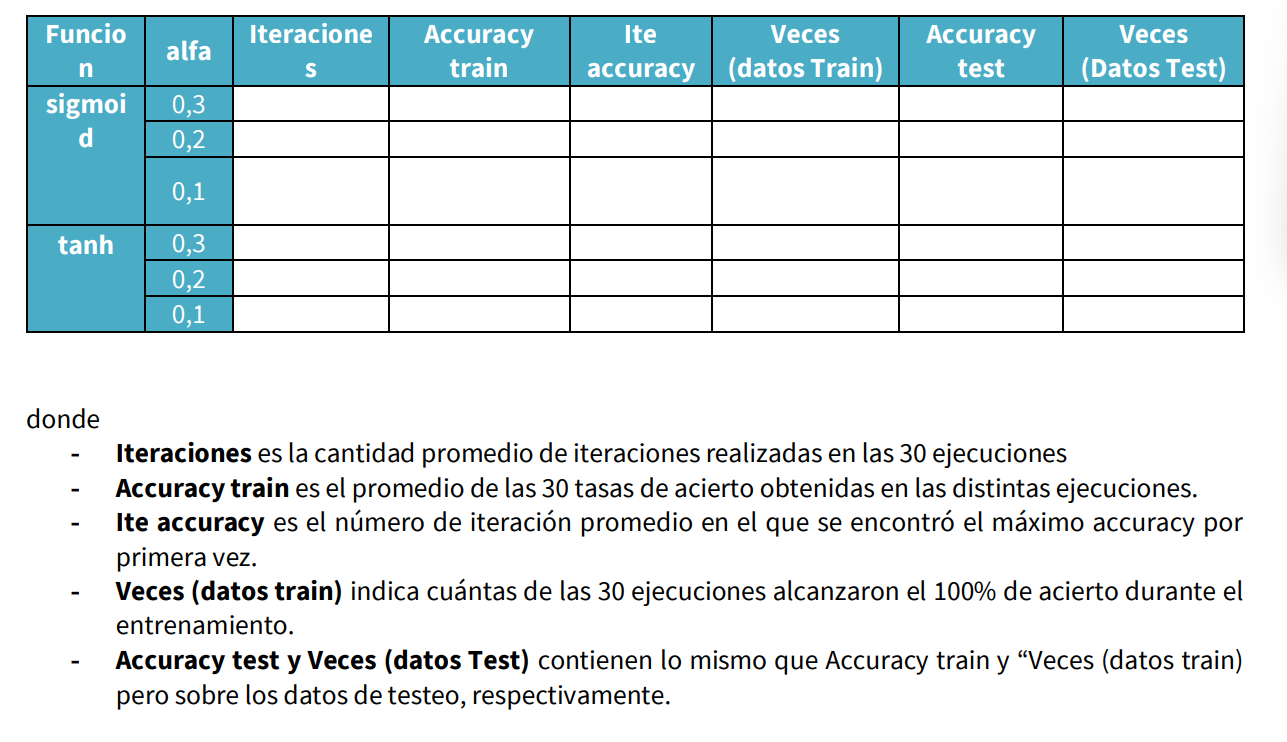

In [38]:
data = pd.DataFrame({
    'Funcion': ['Sigmoid-0.3', 'Sigmoid-0.2', 'Sigmoid-0.1', 'Tanh-0.3', 'Tanh-0.2', 'Tanh-0.1'],
    'Alfa': [0.3, 0.2, 0.1, 0.3, 0.2, 0.1],
    'Iteraciones': ['200', '200', '200', '1.0', '1.0', '1.0'],
    'Accuracy train': ['1.00','1.00', '1.0', '0.3254', '0.3254', '0.3254'],
    'Ite accuracy': ['0.7', '1.43', '3.10', '0.0', '0.0', '0.0'],
    'Veces (datos train)': ['30', '30', '30', '0', '0', '0'],
    'Accuracy test': ['1.0', '1.0', '1.0', '0.3254', '0.3254', '0.3254'],
    'Veces(Datos test)': [' 30', '30', '30', '0', '0.0', '0.0']
})
data

,Funcion,Alfa,Iteraciones,Accuracy train,Ite accuracy,Veces (datos train),Accuracy test,Veces(Datos test)
0,Sigmoid-0.3,0.3,200,1.00,0.7,30,1.0,30
1,Sigmoid-0.2,0.2,200,1.00,1.43,30,1.0,30
2,Sigmoid-0.1,0.1,200,1.0,3.10,30,1.0,30
3,Tanh-0.3,0.3,1.0,0.3254,0.0,0,0.3254,0
4,Tanh-0.2,0.2,1.0,0.3254,0.0,0,0.3254,0.0
5,Tanh-0.1,0.1,1.0,0.3254,0.0,0,0.3254,0.0


No se si estara bien